In [86]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json 

In [87]:
getinput = lambda name, index : "single_" + name + "_" + str(index) + ".npy"
getoutput = lambda name : "all_" + name + ".npy"

In [101]:
cd /media/homes/thisiszhi/Cpp_Version/Simulation_N0200_R010_mu1e-4_Np10_r10_x50_t100


/media/homes/thisiszhi/Cpp_Version/Simulation_N0200_R010_mu1e-4_Np10_r10_x50_t100


In [102]:
cd simulation10/

/media/homes/thisiszhi/Cpp_Version/Simulation_N0200_R010_mu1e-4_Np10_r10_x50_t100/simulation10


In [103]:
def makeGif(frame_stack, name):
    fig = plt.figure()

    animation_frames = []
    for frame in frame_stack:
        frame = np.squeeze(frame)
        animation_frames.append([plt.imshow(frame, animated=True)])

    ani = animation.ArtistAnimation(
        fig, animation_frames, interval=50, blit=False, repeat_delay=1000)

    # FFwriter = animation.PillowWriter(fps=60)

    ani.save(name + ".gif")
    plt.close()
    return 0

def write2json(name, params, sim_params):
    with open(name + '_params.json', 'w') as fp:
        json.dump(params, fp)

    with open(name + '_sim_params.json', 'w') as fp:
        json.dump(sim_params, fp)

In [104]:
def readParameters(fileNameString, typeParams = True):

    if fileNameString in {"params.txt", "Params.txt"} :
        typeParams = True
    elif fileNameString in {"simparams.txt", "sim_params.txt", "Simparams.txt", "Sim_Params.txt"} :
        typeParams = False
    else:
        return ValueError


    if typeParams:
        params = {}
        file = open("params.txt", "r")
        params["Nh"] = int(file.readline().strip())
        params["N0"] = int(file.readline().strip())
        params["R0"] = int(file.readline().strip())
        params["M"] = int(file.readline().strip())
        params["mu"] = float(file.readline().strip())
        params["gamma_shape"] = float(file.readline().strip())
        params["Np"] = int(file.readline().strip())
        params["dc"] = int(file.readline().strip())
        params["h"] = int(file.readline().strip())
        params["r"] = float(file.readline().strip())
        params["rho"] = float(file.readline().strip())
        return params
    
    if not typeParams:
        sim_params = { #parameters relevant for the simulation (including Inital Valuess)
        "dx":                         1,
        "t0":                         0, 
        "dt":                         1,
        }
        file = open("simparams.txt", "r")
        sim_params["xdomain"] = int(file.readline().strip())
        sim_params["tf"] = int(file.readline().strip())
        loc_x = float(file.readline().strip())
        loc_y = float(file.readline().strip())
        sim_params["initial_mean"] = [loc_x, loc_y]
        sim_params["inital_var"] = float(file.readline().strip())
        sim_params["n_step_prior"] = int(file.readline().strip())
        sim_params["ratio_exp"] = int(file.readline().strip())
        return sim_params

In [105]:
stack_f = []
stack_n = []
stack_nh = []

In [106]:
start_time=0
end_time=10000

for i in range(start_time, end_time):

    if not (os.path.isfile(getinput("f", i))):
        break

    stack_f.append(np.load(getinput("f", i)))
    stack_n.append(np.load(getinput("n", i)))
    stack_nh.append(np.load(getinput("nh", i)))

stack_f = np.squeeze(np.array(stack_f))
stack_n = np.squeeze(np.array(stack_n))
stack_nh = np.squeeze(np.array(stack_nh))

In [116]:
# Check if updates happens

for frame_n, frame_nh in zip(stack_n, stack_nh):
    if not np.all(frame_n == frame_nh): {
        print("Every Frame is identical")
    }
    

In [100]:
stack_n.shape

(0,)

In [108]:
np.all(stack_n[-1] == stack_n[-3])

True

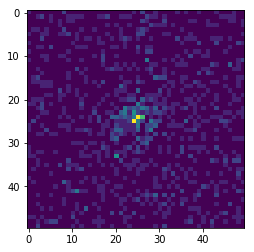

In [109]:
plt.imshow(frame_nh)

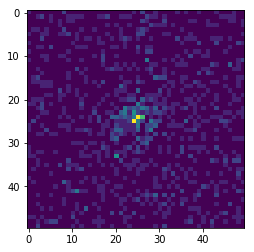

In [110]:
plt.imshow(frame_n)

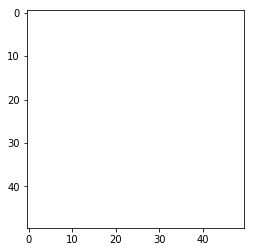

In [113]:
fig = plt.figure()

animation_frames = []
for frame in stack_n:
    frame = np.squeeze(frame)
    animation_frames.append([plt.imshow(frame)])

ani = animation.ArtistAnimation(
    fig, animation_frames, interval=1, blit=False, repeat_delay=1000)

writer = animation.ImageMagickWriter(fps=60)
# writer = animation.PillowWriter(fps=60)

ani.save("all_n.gif", writer = writer)

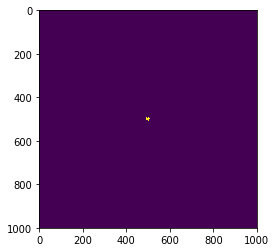

In [53]:
plt.imshow(stack_f[-1])

In [10]:
stack_f.shape

(100, 1000, 1000)

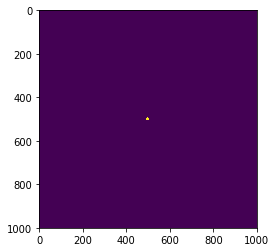

In [13]:
plt.figure()
plt.imshow(stack_f[6, :, :])
plt.show()

In [19]:
np.all(stack_f[90] == stack_f[80])

False

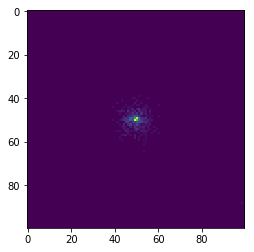

In [11]:
plt.figure()
plt.imshow(stack_n[3, :, :])
plt.show()

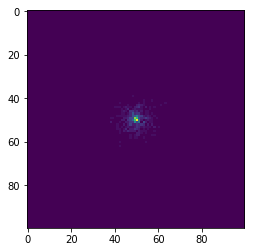

In [5]:
im = np.load("single_nh_3.npy")
plt.imshow(im)